In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter
import numpy as np
import cv2


Implement a function that performs non-maximum suppression. You can leave it for the end

In [2]:
def nonmax_suppression(harris_resp, thr, halfwidth=2):
    # Outputs:
    # 1) cornersy: list with row coordinates of identified corner pixels.
    # 2) cornersx: list with respective column coordinates of identified corner pixels.
    # Elements from the two lists with the same index must correspond to the same corner.
    
    cornersy = []
    cornersx = []
    h, w = im.shape[:2]
    
    # TODO: perform non-maximum suppression
    
    for i in range(h):
        for j in range(w):
            
            # Case for top-left pixel
            if (i==0 and j==0):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i][j+1], harris_resp[i+1][j], harris_resp[i+1][j+1]]
                
            # Case for top-right pixel
            elif (i==0 and j==(im.shape[1]-1)):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i][j-1], harris_resp[i+1][j-1],harris_resp[i+1][j]]
                
            # Case for bottom-left pixel
            elif (i==(im.shape[0]-1) and j==0):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i-1][j], harris_resp[i-1][j+1], harris_resp[i][j+1]]
                
            # Case for bottom-right pixel
            elif (i==(im.shape[0]-1) and j==(im.shape[1]-1)):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i-1][j-1], harris_resp[i-1][j], harris_resp[i][j-1]]
                
            # Case for top-intermediate pixels
            elif (i==0 and j!=0 and j!=(im.shape[1]-1)):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i][j-1], harris_resp[i][j+1], harris_resp[i+1][j-1], harris_resp[i+1][j], harris_resp[i+1][j+1]]
            
            # Case for left-intermediate pixels
            elif (i!=0 and i!=(im.shape[0]-1) and j==0):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i-1][j], harris_resp[i-1][j+1], harris_resp[i][j+1], harris_resp[i+1][j], harris_resp[i+1][j+1]]
                
            # Case for right-intemediate pixels
            elif (i!=0 and i!=(im.shape[0]-1) and j==(im.shape[1]-1)):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i-1][j-1], harris_resp[i-1][j], harris_resp[i][j-1], harris_resp[i+1][j-1],harris_resp[i+1][j]]
            
            # Case for bottom-intermediate pixels
            elif (i==(im.shape[0]-1) and j!=0 and j!=(im.shape[1]-1)):
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i-1][j-1], harris_resp[i-1][j], harris_resp[i-1][j+1], harris_resp[i][j-1], harris_resp[i][j+1]]
            
            # Case for all other intermediate pixels
            else:
                neighbouring_pixels = [harris_resp[i][j], harris_resp[i-1][j-1], harris_resp[i-1][j], harris_resp[i-1][j+1], harris_resp[i][j-1], harris_resp[i][j+1], harris_resp[i+1][j-1], harris_resp[i+1][j], harris_resp[i+1][j+1]]
            
            
            # Checking if requirements are met
            if ((harris_resp[i][j] >= thr) and (neighbouring_pixels.index(max(neighbouring_pixels)) == 0)):
                cornersy.append(i)  # Row number of corner pixel
                cornersx.append(j)  # Column number of corner pixel
            
    
    return cornersy, cornersx

Implement the main part of the exercise

In [18]:
# Define parameters
sigma_w = 2.0
sigma_d = 2.0
kappa = 0.04
rot_angle = 0
thresh = 800

# Read the image
im = cv2.imread('./CircleLineRect.png', 0)
im = im.astype('float')

# Rotation of the image
if rot_angle != 0:
    im = rotate(im, rot_angle)

# TODO: Implement Harris corners

# Smoothed First Partial Derivatives of I in the other direction

I_x = gaussian_filter1d(im, sigma_d, axis = 0, order = 0)
I_y = gaussian_filter1d(im, sigma_d, axis = 1, order = 0)

# Smoothed First Partial Derivatives of I in their own direction and derivative

I_x = gaussian_filter1d(I_x, sigma_d, axis = 1, order = 1)
I_y = gaussian_filter1d(I_y, sigma_d, axis = 0, order = 1)

# Squared and Smoothed First Partial Derivatives of I

I_x_sq = I_x**2
I_x_sq = gaussian_filter(I_x_sq, sigma_w, order = 0)
I_y_sq = I_y**2
I_y_sq = gaussian_filter(I_y_sq, sigma_w, order = 0)
I_xy = I_x*I_y
I_xy = gaussian_filter(I_xy, sigma_w, order = 0)

# Define 2D Array for the Harris Response
H = np.ndarray(shape = (im.shape[0],im.shape[1]), dtype = float)

# Auto-correlation Matrix A for each pixel
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        A = [[I_x_sq[i][j], I_xy[i][j]], [I_xy[i][j], I_y_sq[i][j]]]
        # Harris Response H for pixel with coordinates[i,j]
        H[i][j] = np.linalg.det(A) - kappa*((np.trace(A))**2)

corn = nonmax_suppression(H, thresh, 2)


Visualization of the results

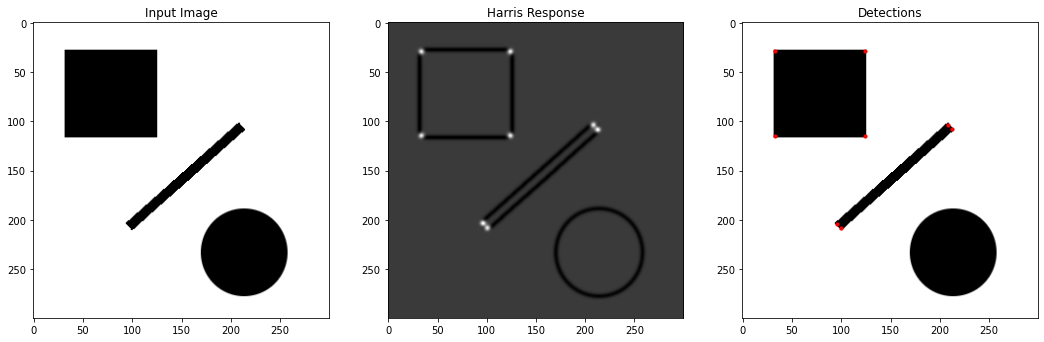

In [19]:
# Plotting of results
# No need to change it
plt.close("all")
plt.ion()
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Harris Response")
ax_arr[2].set_title("Detections")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(H, cmap='gray')
ax_arr[2].imshow(im, cmap='gray')
ax_arr[2].scatter(x=corn[1], y=corn[0], c='r', s=10)